In [2]:
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt 

In [3]:
img = cv2.imread('pearl.png')

In [4]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [5]:
df = pd.DataFrame()

In [6]:
# add original pixel values to the data frame as feature 
img2 = img.reshape(-1)
df['Original Image'] = img2

In [7]:
# add other features
# First set Gabor features 

#Save original image pixels into a data frame. This is our Feature #1.
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

#Generate Gabor features
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []  #Create empty list to hold all kernels that we will generate in a loop
for theta in range(2):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with values of 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                           
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
#                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                
# print(df.head())

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

In [8]:
print(df.head())

   Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0              56       0       0     255     158      93      51      38   
1              56       0       0     255     158      93      51      38   
2              56       0       0     255     158      93      51      38   
3              56       0       0     255     158      93      51      38   
4              56       0       0     255     158      93      51      38   

   Gabor8  Gabor9  ...  Gabor23  Gabor24  Gabor25  Gabor26  Gabor27  Gabor28  \
0      21       0  ...      111       21        0        0      255      255   
1      21       0  ...      111       21        0        0      255      255   
2      21       0  ...      111       21        0        0      255      255   
3      21       0  ...      111       21        0        0      255      255   
4      21       0  ...      111       21        0        0      255      255   

   Gabor29  Gabor30  Gabor31  Gabor32  
0       26      

In [9]:
# Canny edge 
from skimage.filters import roberts, sobel, scharr, prewitt

edges = cv2.Canny(img,100, 200)
edges1 = edges.reshape(-1)
df['Canny Edges'] = edges1

In [10]:
#ROBERTS EDGE
edge_roberts = roberts(img)
edge_roberts1 = edge_roberts.reshape(-1)
df['Roberts'] = edge_roberts1

In [11]:
#SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

In [12]:

#SCHARR
edge_scharr = scharr(img)
edge_scharr1 = edge_scharr.reshape(-1)
df['Scharr'] = edge_scharr1

In [13]:
#PREWITT
edge_prewitt = prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['Prewitt'] = edge_prewitt1

In [14]:
#GAUSSIAN with sigma=3
from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

In [15]:
#GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3

In [16]:
#MEDIAN with sigma=3
median_img = nd.median_filter(img, size=3)
median_img1 = median_img.reshape(-1)
df['Median s3'] = median_img1

In [17]:
#VARIANCE with size=3
variance_img = nd.generic_filter(img, np.var, size=3)
variance_img1 = variance_img.reshape(-1)
df['Variance s3'] = variance_img1  #Add column to original dataframe

In [18]:
df.head()

,Original Image,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Gabor32,Canny Edges,Roberts,Sobel,Scharr,Prewitt,Gaussian s3,Gaussian s7,Median s3,Variance s3
0,56,0,0,255,158,93,51,38,21,0,...,28,0,0.000000,0.000000,4.906539e-18,0.000000,98,94,56,0
1,56,0,0,255,158,93,51,38,21,0,...,28,0,0.352167,0.124510,9.338235e-02,0.166013,102,94,56,56
2,56,0,0,255,158,93,51,38,21,0,...,28,0,0.494133,0.276660,2.924098e-01,0.260011,108,94,56,184
3,56,0,0,255,158,93,51,38,21,0,...,28,0,0.484349,0.345945,3.461108e-01,0.345728,116,95,56,127
4,56,0,0,255,158,93,51,38,21,0,...,28,0,0.478431,0.340388,3.398654e-01,0.341086,123,96,56,34


In [19]:
labeled_img = cv2.imread('markers_result_skimage.jpg')
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY)  
labeled_img1 = labeled_img.reshape(-1)

In [20]:
df['Labels'] = labeled_img1

In [21]:
# dependent variable 

Y = df['Labels'].values

In [22]:
X = df.drop(labels = ['Labels'], axis=1)

In [23]:
# split data into test and train 

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
# import and train the model 

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, random_state=22)

In [25]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10, random_state=22)

In [26]:
prediction_test = model.predict(X_test)

In [27]:
from sklearn import metrics
print(metrics.accuracy_score(Y_test,prediction_test))

0.7357274680059299


In [28]:
features_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_, index=features_list).sort_values(ascending=False)

In [29]:
feature_imp

Median s3         0.141400
Gabor7            0.087287
Original Image    0.067481
Gabor24           0.060099
Gabor23           0.054576
Gaussian s7       0.051355
Gaussian s3       0.049258
Scharr            0.045069
Gabor30           0.044738
Roberts           0.042747
Sobel             0.042562
Prewitt           0.042337
Variance s3       0.040506
Gabor31           0.035569
Gabor6            0.033640
Gabor32           0.030469
Gabor21           0.028709
Gabor29           0.027971
Gabor8            0.020019
Gabor5            0.018076
Gabor3            0.014019
Gabor4            0.006255
Canny Edges       0.004401
Gabor12           0.004390
Gabor11           0.003457
Gabor22           0.001163
Gabor20           0.001109
Gabor28           0.000904
Gabor27           0.000363
Gabor19           0.000070
Gabor14           0.000000
Gabor10           0.000000
Gabor26           0.000000
Gabor25           0.000000
Gabor1            0.000000
Gabor9            0.000000
Gabor18           0.000000
G

In [30]:
import pickle

In [32]:
filename = 'sandstone_model'
pickle.dump(model, open(filename, 'wb'))

In [33]:
load_model = pickle.load(open(filename, 'rb'))

In [34]:
result = load_model.predict(X)

In [35]:
sgmented = result.reshape((img.shape))

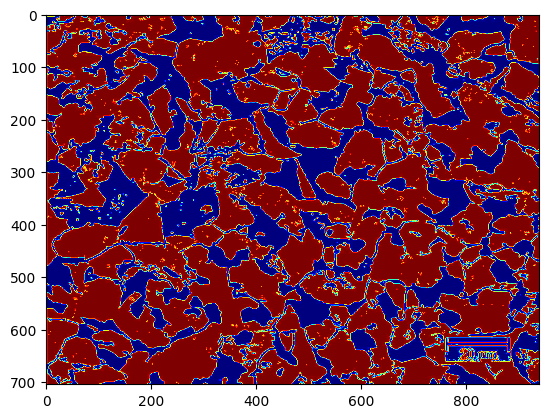

In [38]:
plt.imshow(sgmented, cmap='jet')

In [39]:
sgmented

array([[  5,   0,   0, ...,   0,   0,   0],
       [  0,  24, 245, ..., 255, 255, 255],
       [ 20,   0, 255, ..., 253, 253, 253],
       ...,
       [  1,   0, 255, ...,   0,   2,   2],
       [  1,   0, 255, ...,   0,   0,   0],
       [  1,   0, 255, ...,   0,   0,   0]], dtype=uint8)